In [1]:
# Imports
%pylab inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../../src')
from helpers import *
from plothelpers import *
from BayesianNamingGame import *
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load all data
results = {}
pis = ['flat','stair_up', 'stair_down', 'peak', 'lower_half', 'upper_half']
for pi in pis:
    results[pi] = {'phis':[]}
    for run in range(1,16):
        fn = f'../../results/BNG04/BNG04-pi-{pi}-run-{run:0>4}'
        params = load_BNG_simulation(fn)
        if run == 1:
            results[pi]['params'] = params
        results[pi]['phis'].append(params['phis'])  
    results[pi]['phis'] = array(results[pi]['phis'])

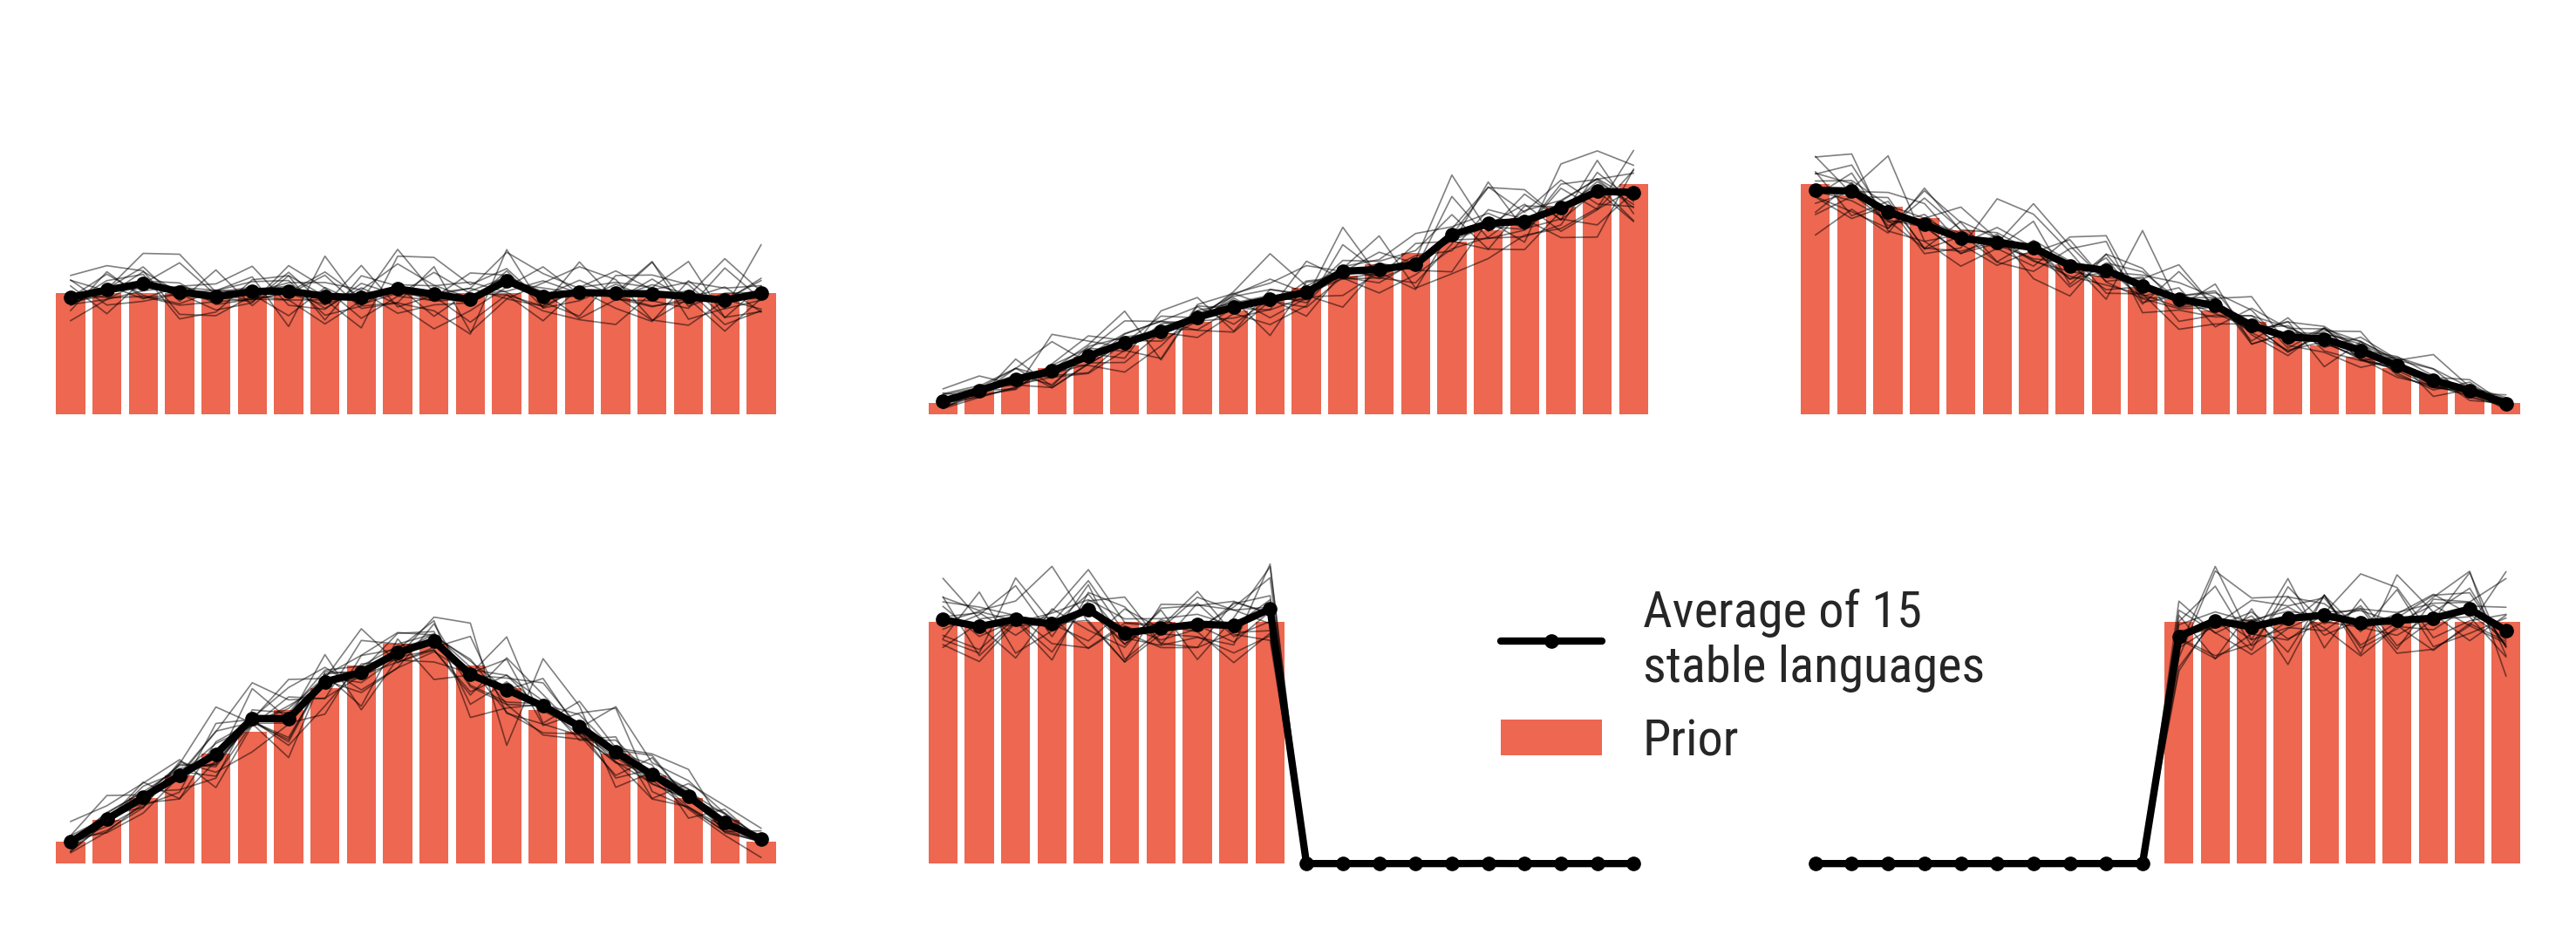

In [3]:
# plot
def show_dist(pi):
    alpha = results[pi]['params']['alpha']
    ps = results[pi]['phis']
    xs = arange(results[pi]['params']['K'])
    
    plot(xs, ps.mean(axis=1).T, 'k', lw=.2, alpha=.5)
    plot(xs, ps.mean(axis=1).mean(axis=0), 'o-k', ms=2, lw=1,
         label='Average of 15\nstable languages')
    pyplot.bar(xs, alpha/sum(alpha), label=r'Prior',
              color=get_color('orange'))

figure(figsize=cm2inch(12,4))

ax1 = subplot(231)
show_dist('flat')

ax2 = subplot(232, sharey=ax1)
show_dist('stair_up')

ax3 = subplot(233, sharey=ax1)
show_dist('stair_down')

ax4 = subplot(234, sharey=ax1)
show_dist('peak')

ax5 = subplot(235, sharey=ax1)
show_dist('lower_half')

ax6 = subplot(236, sharey=ax1)
show_dist('upper_half')

ylim(-0.005,.15)
yticks([])
for ax in [ax1,ax2,ax3,ax4,ax5,ax6]:
    sca(ax)
    xticks([])
    xlim(-.5, 19.5)

sns.despine(left=True,bottom=True)
legend(bbox_to_anchor=(.3, .85))

subplots_adjust(left=0, bottom=0, right=1, top=1)
savefig('BNG04-resulting-distributions.pdf', bbox_inches='tight')
copyfig('BNG04-resulting-distributions.pdf')